In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

In [7]:
df=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [8]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [11]:
num_df=df.select_dtypes(include='float64')

In [13]:
num_df.describe()

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,267.000000,267.000000,267.000000
mean,12.236929,41.681573,22.826048,80.532425
std,10.803283,7.845419,6.270731,5.831738
min,0.500000,16.770000,10.850500,71.192400
25%,4.845000,37.265000,18.112400,76.085600
50%,9.650000,40.390000,23.610200,79.019300
75%,16.755000,44.055000,27.278400,85.279900
max,75.850000,69.690000,33.778200,92.937600


In [14]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [18]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')
df.drop(columns='Month', inplace=True)

<ipython-input-34-947c3bd4cff0>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



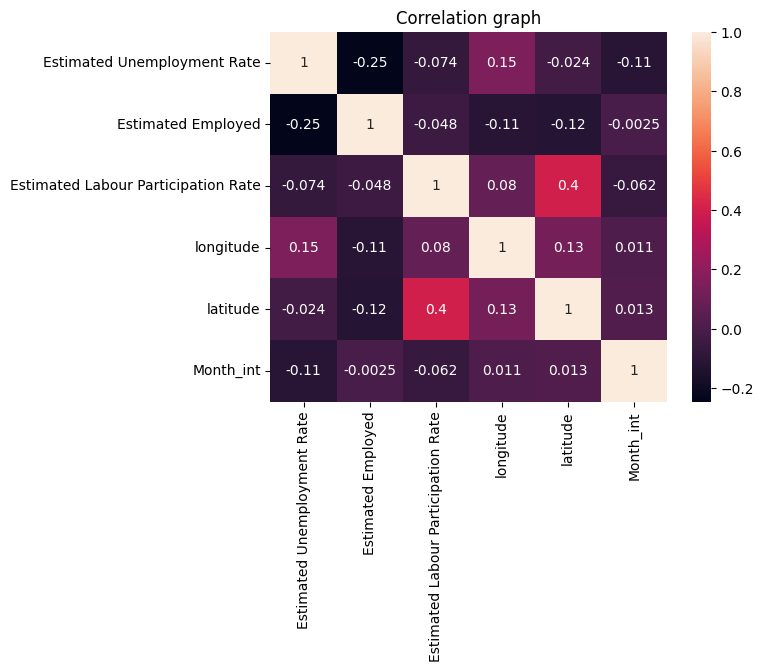

In [34]:
heatmaps=df.corr()
sns.heatmap(heatmaps,annot=True)
plt.title('Correlation heatmap')
plt.show()


In [22]:
import plotly.express as px

In [37]:
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Box Plots Of Each State')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

<ipython-input-33-fb652ff48fd1>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



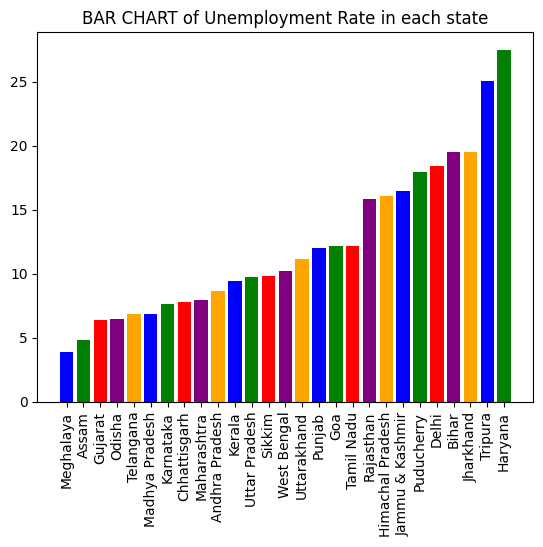

In [33]:
df_new=df[['States','Estimated Unemployment Rate']]
df_n1=df.groupby('States').mean().reset_index()
df_n1=df_n1.sort_values('Estimated Unemployment Rate')
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.bar(df_n1['States'], df_n1['Estimated Unemployment Rate'],color=colors)
plt.title('BAR CHART of Unemployment Rate in each state')
plt.xticks(rotation=90)
plt.show()

**Haryana is the worst hit during the covid 19 with regards to unemployment**